## Load data

In [1]:
import sys
 
sys.path.insert(0, "../")

In [2]:
from dataAnalysis.DataAnalysis import DataAnalysis
import pandas as pd

data = pd.read_csv(r"../extdata/sbcdata.csv", header=0)
data_analysis = DataAnalysis(data)

/home/dwalke/miniconda3/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/dwalke/git/sbc/statistics/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']
/home/dwalke/git/sbc/statistics/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

## Violin plots for comparison of dataset distributions

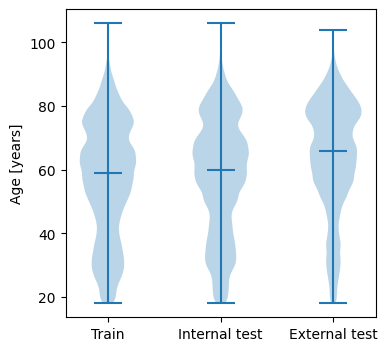

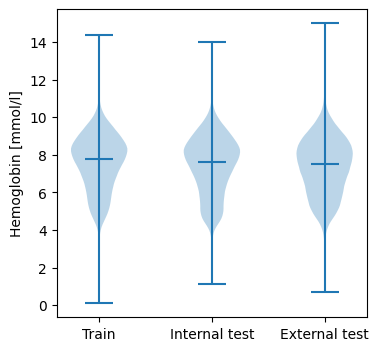

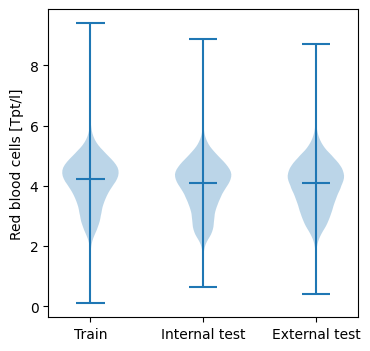

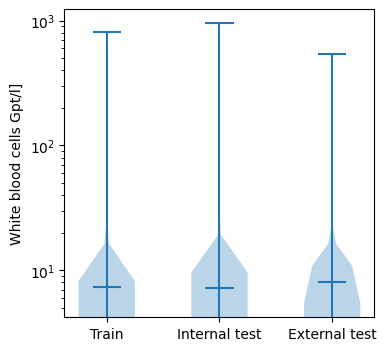

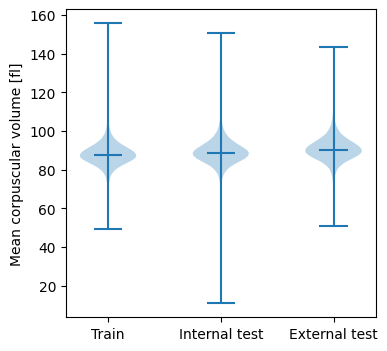

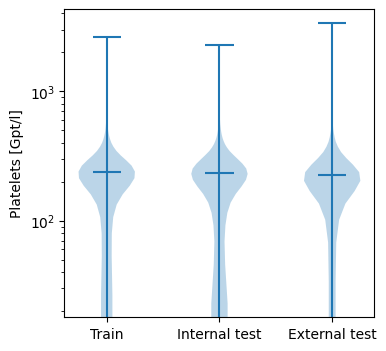

In [16]:
import matplotlib.pyplot as plt
import matplotlib
from dataAnalysis.Constants import * 
import numpy as np

FEATURE_LABELS = [f"{AGE_COLUMN_NAME} [years]",f"Hemoglobin [mmol/l]", "Red blood cells [Tpt/l]",
                  "White blood cells Gpt/l]", "Mean corpuscular volume [fl]", "Platelets [Gpt/l]"]
VIOLIN_FEATURES= [AGE_COLUMN_NAME, HGB_COLUMN_NAME, RBC_COLUMN_NAME, WBC_COLUMN_NAME, MCV_COLUMN_NAME, PLT_COLUMN_NAME]
labels = ["Train", "Internal test", "External test"]
training_df = data_analysis.get_training_data()
testing_df = data_analysis.get_testing_data()
gw_df = data_analysis.get_gw_testing_data()
matplotlib.rcParams.update({'font.size': 10})
for i, feature in enumerate(VIOLIN_FEATURES):
    fig, ax = plt.subplots(figsize=(len(labels), len(labels)))
    fig.set_size_inches(4, 4)
    y = [training_df[feature], testing_df[feature], gw_df[feature]]
    
    ax.violinplot(y,showmedians=True)
    if feature in [WBC_COLUMN_NAME, PLT_COLUMN_NAME]:
        ax.semilogy()
        
    ax.set_ylabel(FEATURE_LABELS[i])
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.get_xaxis().set_tick_params(direction='out')
    fig.show()
    

In [22]:
training_df[PLT_COLUMN_NAME].min()

0.0

## Violin plots for comparison of labe

In [6]:
X_train = data_analysis.get_X_train()
X_test = data_analysis.get_X_test()
X_gw = data_analysis.get_X_gw()

y_train = data_analysis.get_y_train()
y_test = data_analysis.get_y_test()
y_gw = data_analysis.get_y_gw()

In [17]:
import numpy as np
from dataAnalysis.FeatureImportance import normalize

X_all = np.concatenate([X_train, X_test, X_gw])
y_all = np.concatenate([y_train, y_test, y_gw])
X_all = np.concatenate([X_train])
y_all = np.concatenate([y_train])

In [18]:
X_sepsis = X_all[y_all.astype(np.bool_)]
X_control = X_all[~y_all.astype(np.bool_)]

Age
[22. 87.]
[25. 83.]
[29. 79.]
SexCategory
[0. 1.]
[0. 1.]
[0. 1.]
HGB
[ 4.6 10.1]
[4.9 9.7]
[5.4 9.4]
WBC
[ 1.3 18.4]
[ 2.6 15.4]
[ 3.9 12.8]
RBC
[2.44 5.49]
[2.65 5.3 ]
[2.94 5.08]
MCV
[ 75.8 100.3]
[78.5 97.6]
[81.  94.9]
PLT
[ 32. 500.]
[ 61. 431.]
[115. 369.]


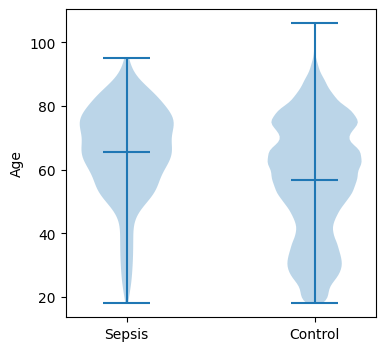

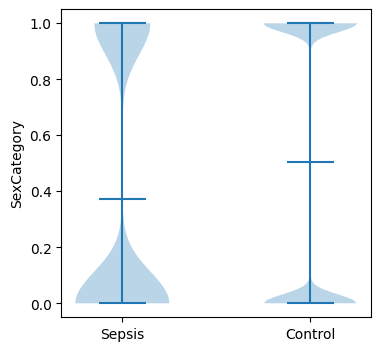

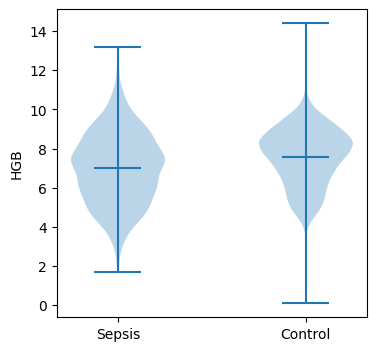

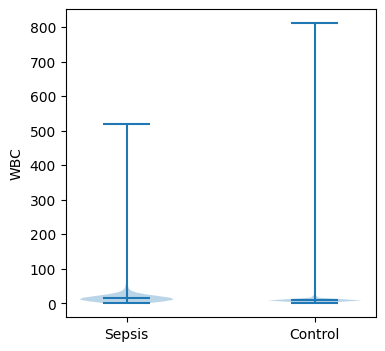

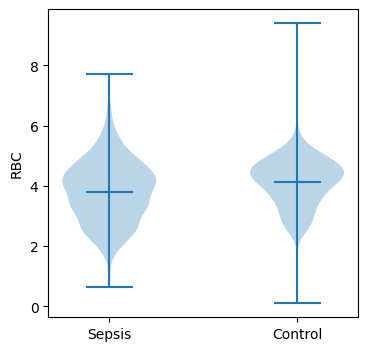

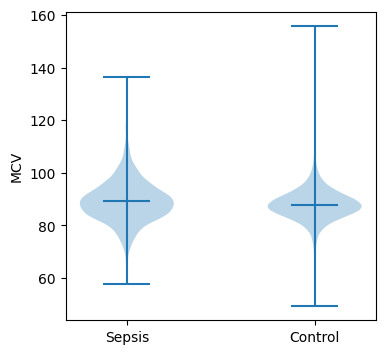

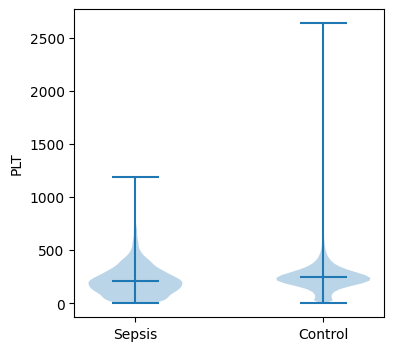

In [19]:
import matplotlib
import matplotlib.pyplot as plt
from dataAnalysis.Constants import FEATURES
matplotlib.rcParams.update({'font.size': 10})
for i, feature in enumerate(FEATURES):
    fig, ax = plt.subplots(figsize=(2, 2))
    fig.set_size_inches(4, 4)
    print(feature)
    print(np.quantile(X_control[:, i], [0.025, 0.975]))
    print(np.quantile(X_control[:, i], [0.05, 0.95]))
    print(np.quantile(X_control[:, i], [0.1, 0.9]))
    ax.violinplot([X_sepsis[:, i], X_control[:, i]], showmeans=True)
    ax.set_ylabel(feature)
    ax.set_xticks(np.arange(1, 2 + 1))
    ax.set_xticklabels(["Sepsis", "Control"])
    ax.get_xaxis().set_tick_params(direction='out')
    fig.show()

## ANOSIM

In [ ]:
##https://www.graphpad.com/guides/prism/latest/statistics/stat_nonparametric_tests_dont_compa.htm

In [4]:
from imblearn.under_sampling import RandomUnderSampler as RUS
rus = RUS(random_state=42)
X_res, y_res = rus.fit_resample(X_all, y_all)

In [18]:
from scipy.spatial import distance_matrix

d_matrix = distance_matrix(X_res, X_res)

In [21]:
import numpy as np
# make output deterministic; not necessary for normal use
np.random.seed(0)
from skbio.stats.distance import anosim
from skbio import DistanceMatrix

dm = DistanceMatrix(d_matrix)
anosim(dm, y_res, permutations=99)


method name                 ANOSIM
test statistic name              R
sample size                   4928
number of groups                 2
test statistic            0.042067
p-value                       0.01
number of permutations          99
Name: ANOSIM results, dtype: object